In [1]:
from pathlib import Path
import pandas as pd
import os
wd = Path.cwd().parent
path_to_data = [[wd / "input" / "vifwomen_a_2020.xlsx", wd / "input" / "vifwomen_a_2021.xlsx"],
                [wd / "input" / "rosenborg-women_a_2020.xlsx", wd / "input" / "rosenborg-women_a_2021.xlsx"]]
os.chdir(Path.cwd().parent)
from preprocessing.data_loader import generate_teams
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Load in Data

In [2]:
teams = generate_teams(path_to_data, ["VI", "Rosenborg"])
players = teams["Rosenborg"].players

## Analyse the feature correlations

In [3]:
feature_corrleation = pd.DataFrame({"readiness": [player.readiness.median() for player in players.values()],
"fatique":  [player.fatigue.median() for player in players.values()],
"sleep_quality": [player.sleep_quality.median() for player in players.values()],
"sleep_duration": [player.sleep_duration.median() for player in players.values()],
"soreness" : [player.soreness.median() for player in players.values()],
"mood" : [player.mood.median() for player in players.values()],
"stress": [player.stress.median() for player in players.values()],
"injuries": [np.sum(player.injury_ts) for player in players.values()]
}).corr()

![legend](feature_legend.png)

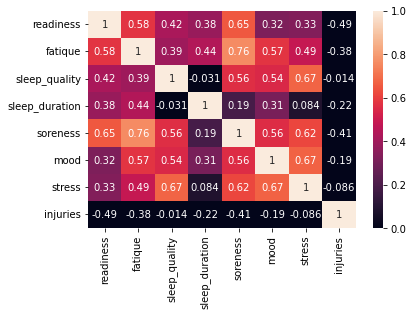

In [4]:
ax = sns.heatmap(feature_corrleation, vmin=0, vmax=1, annot=True)

## Team Attributes

In [5]:
team_attributes = pd.DataFrame({"readiness": pd.DataFrame([player.readiness for player in players.values()]).mean(),
"fatique":  pd.DataFrame([player.fatigue for player in players.values()]).mean(),
"sleep_quality": pd.DataFrame([player.sleep_quality for player in players.values()]).mean(),
"sleep_duration": pd.DataFrame([player.sleep_duration for player in players.values()]).mean(),
"soreness" : pd.DataFrame([player.soreness for player in players.values()]).mean(),
"mood" : pd.DataFrame([player.mood for player in players.values()]).mean(),
"stress": pd.DataFrame([player.stress for player in players.values()]).mean(),
"injuries": pd.DataFrame([player.injury_ts for player in players.values()]).sum(),
})

## Features averaged over team  

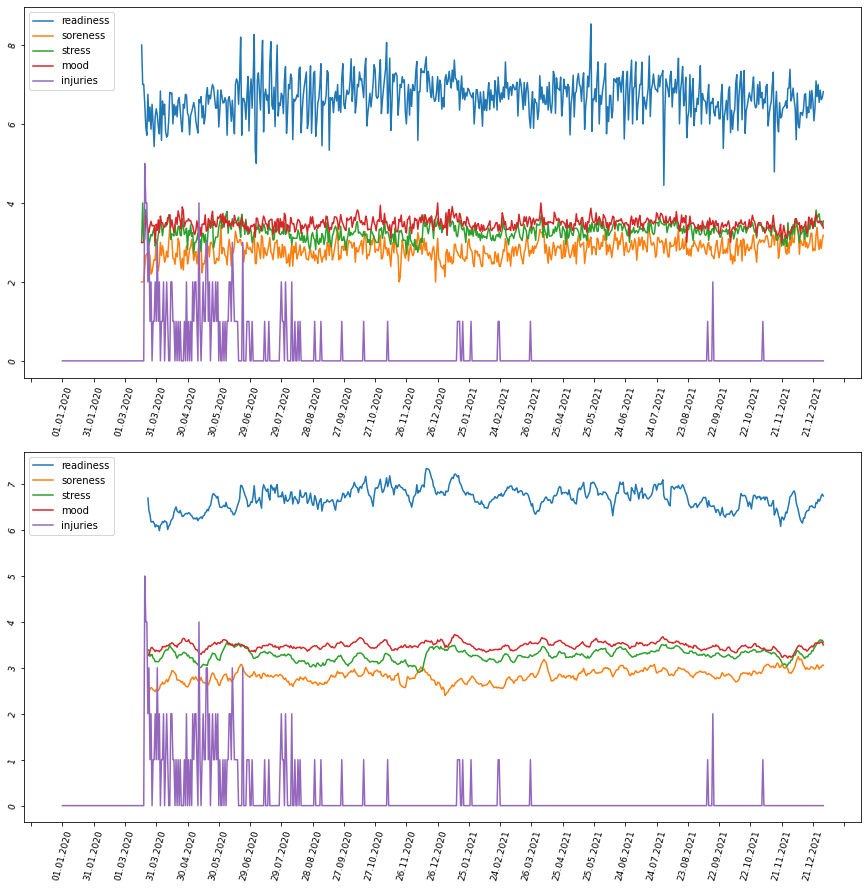

In [6]:
from matplotlib.ticker import MultipleLocator
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,15))
for smoothing_param, ax in zip([1, 7], axs.ravel()):
    ax.plot(team_attributes["readiness"].rolling(smoothing_param).mean(), label="readiness")
    ax.plot(team_attributes["soreness"].rolling(smoothing_param).mean(), label="soreness")
    ax.plot(team_attributes["stress"].rolling(smoothing_param).mean(), label="stress")
    ax.plot(team_attributes["mood"].rolling(smoothing_param).mean(), label="mood")
    ax.plot(team_attributes["injuries"], label="injuries")
    ax.legend()
    ax.tick_params(labelrotation=75,labelsize=9)
    ax.xaxis.set_major_locator(MultipleLocator(30))

In [ ]:
plot_acf(team_attributes["readiness"], missing="drop", lags=60)

In [ ]:
plot_acf(players["1"].readiness, missing="drop", lags=40)

In [ ]:
plot_acf(players["1"].readiness.diff(), missing="drop", lags=40)

## Time Series Autocorrelation 

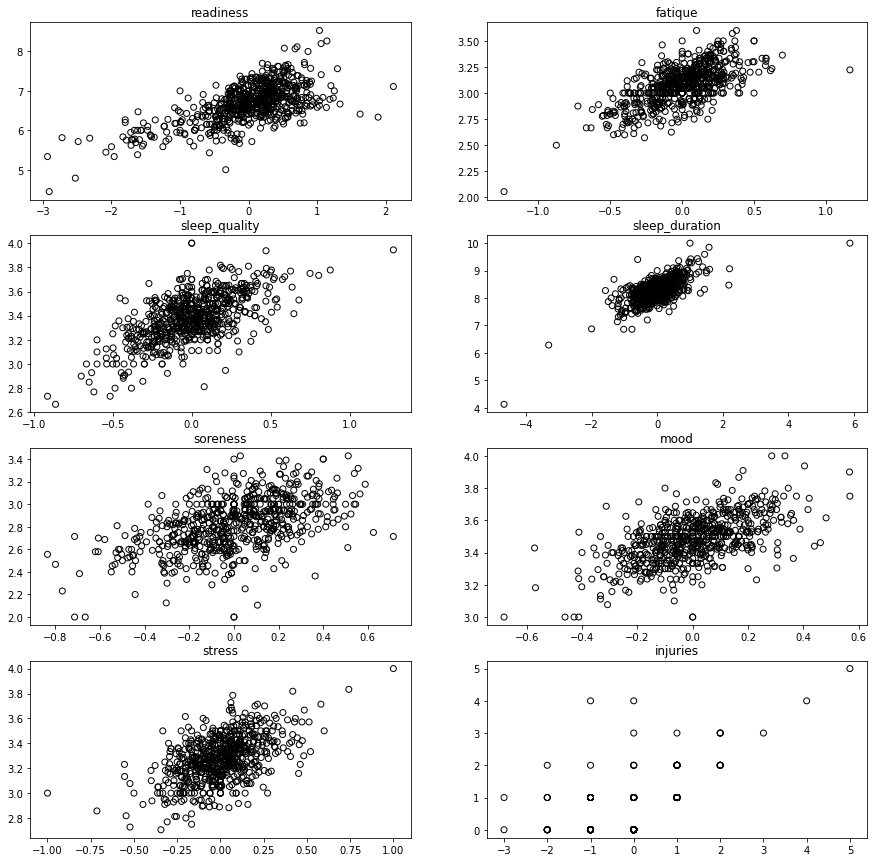

In [7]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
list_of_ts = [team_attributes[series] for series in team_attributes]
for feature, ax in zip(list_of_ts, axs.ravel()):
    ax.scatter(feature.diff(), feature, facecolors='none', edgecolors='black')
    ax.set_title(feature.name)
    

## Time Series Distributions

### Players time series distributions 

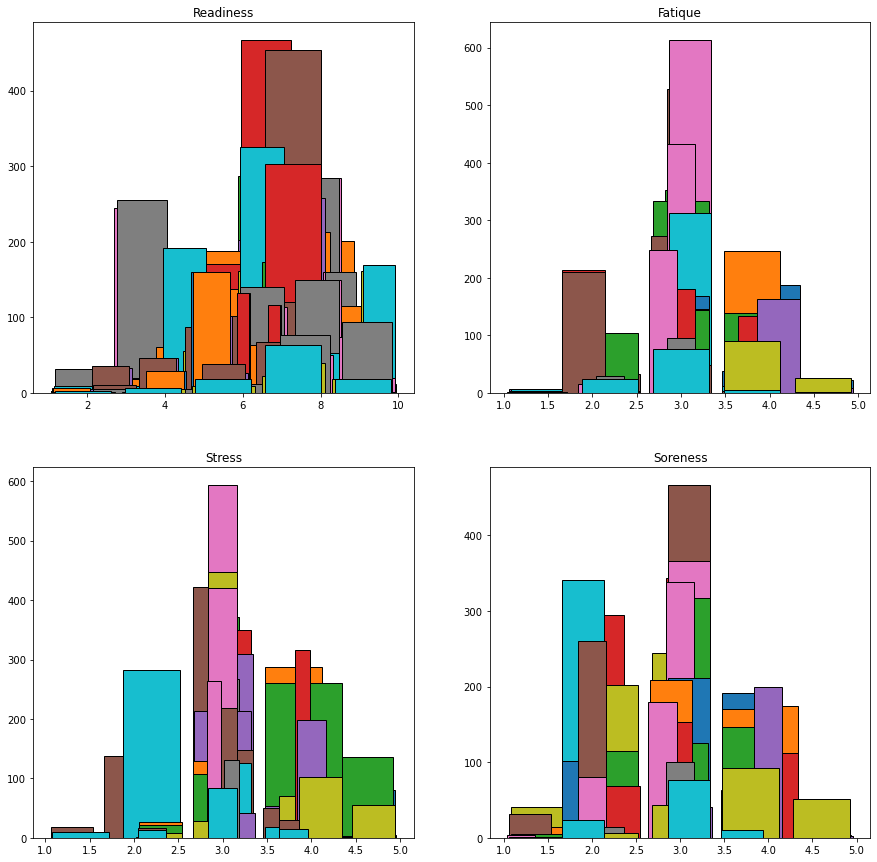

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
readiness = [player.readiness for player in players.values()]
fatique = [player.fatigue for player in players.values()]
stress = [player.stress for player in players.values()]
soreness = [player.soreness for player in players.values()]
for feature, title, ax in zip([readiness, fatique, stress, soreness],["Readiness", "Fatique", "Stress", "Soreness"], axs.ravel()):
    for series_per_player in feature:
        if title == "Readiness":
            ax.hist(series_per_player, bins=10, histtype="barstacked", rwidth=0.8, edgecolor='black')
            ax.set_title(title)
        ax.hist(series_per_player, bins=5, histtype="barstacked", rwidth=0.8, edgecolor='black')
        ax.set_title(title)


### Team time series distributions 

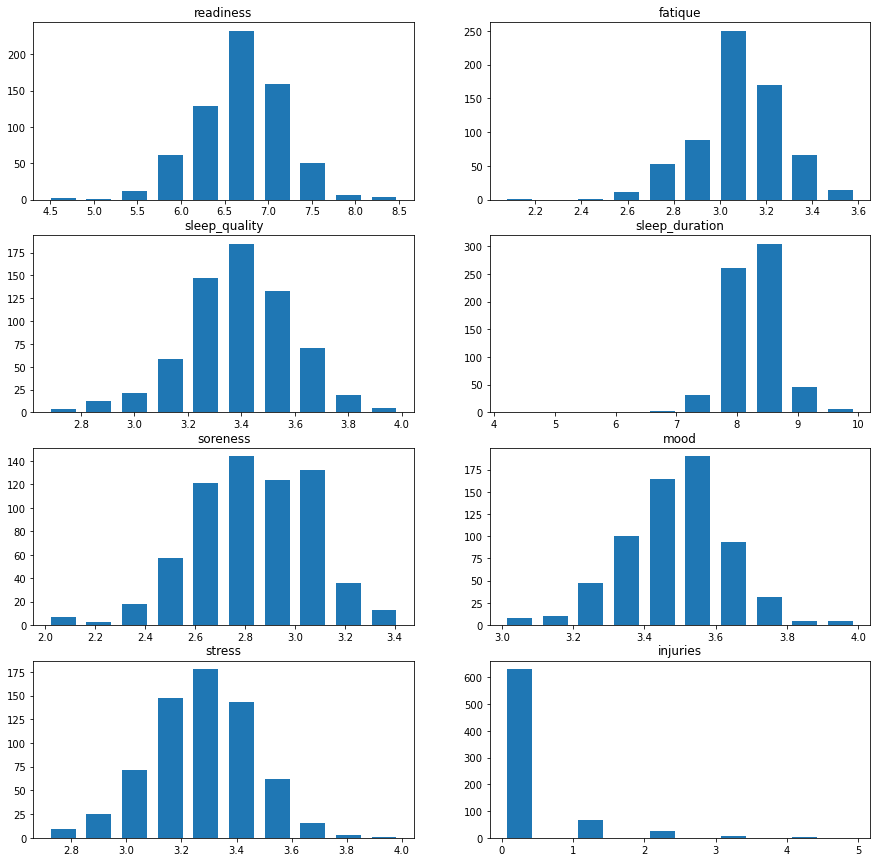

In [9]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
list_of_ts = [team_attributes[series] for series in team_attributes]
for feature, ax in zip(list_of_ts, axs.ravel()):
    ax.hist(feature, rwidth=0.7)
    ax.set_title(feature.name)
    